In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

%matplotlib inline

In [2]:
chall = pd.read_csv('TFT_Challenger_MatchData.csv')

In [3]:
chall.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4247538593,2142.470703,8,35,1,2134.272217,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [27], 'star': 3}, 'Sona..."
1,KR_4247538593,2142.470703,9,35,2,2134.272217,"{'Blaster': 2, 'Mercenary': 1, 'Rebel': 6, 'Se...","{'Malphite': {'items': [7], 'star': 2}, 'Yasuo..."
2,KR_4247538593,2142.470703,8,34,3,2073.459229,"{'Cybernetic': 1, 'DarkStar': 3, 'Demolitionis...","{'KaiSa': {'items': [99, 2, 23], 'star': 2}, '..."
3,KR_4247538593,2142.470703,8,33,4,1998.146729,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 1,...","{'KaiSa': {'items': [44, 37], 'star': 2}, 'Ann..."
4,KR_4247538593,2142.470703,9,33,5,1986.443237,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {..."


In [4]:
chall.isnull().sum()

gameId            0
gameDuration      0
level             0
lastRound         0
Ranked            0
ingameDuration    0
combination       0
champion          0
dtype: int64

### 게임 소요 시간
#### - 최소 1분, 평균 36분, 최대 46분

In [5]:
chall_time = round(chall.gameDuration.agg(['min','mean','max']).to_frame() / 60)
chall_time.columns = ['gameDuration (min)']
chall_time

,gameDuration (min)
min,1.0
mean,36.0
max,46.0


### 전체 순위

In [6]:
combinations = chall.combination.apply(lambda x: re.findall('[a-zA-Z]+[0-9]?_?[a-zA-Z]+',x)).to_frame()
all_combi = Counter()
for combi in combinations.combination:
    all_combi += Counter(combi)

,combination
0,"[DarkStar, Protector, Rebel, Set3_Celestial, S..."
1,"[Blaster, Mercenary, Rebel, Set3_Blademaster, ..."
2,"[Cybernetic, DarkStar, Demolitionist, Infiltra..."
3,"[Blaster, Cybernetic, DarkStar, Demolitionist,..."
4,"[Blaster, Demolitionist, Mercenary, Rebel, Set..."
...,...
79994,"[DarkStar, Demolitionist, Infiltrator, MechPil..."
79995,"[Blaster, Chrono, Cybernetic, Infiltrator, Man..."
79996,"[Chrono, Cybernetic, Demolitionist, Infiltrato..."
79997,"[Blaster, Chrono, Cybernetic, Mercenary, Prote..."


#### - 전체 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. Vanguard(선봉대)

In [8]:
all_combi = pd.DataFrame.from_dict(all_combi, orient='index', columns=['Count']).reset_index()
all_combi = all_combi.sort_values(['Count'], ascending=False)
all_combi.columns = ['Combination','Count']
all_combi = all_combi.reset_index(drop=True)
all_combi

,Combination,Count
0,Chrono,49844
1,Cybernetic,42260
2,Vanguard,40553
3,Valkyrie,37298
4,Blaster,37001
5,Set3_Celestial,36875
6,DarkStar,36831
7,Set3_Brawler,34835
8,ManaReaver,32670
9,Set3_Blademaster,31898


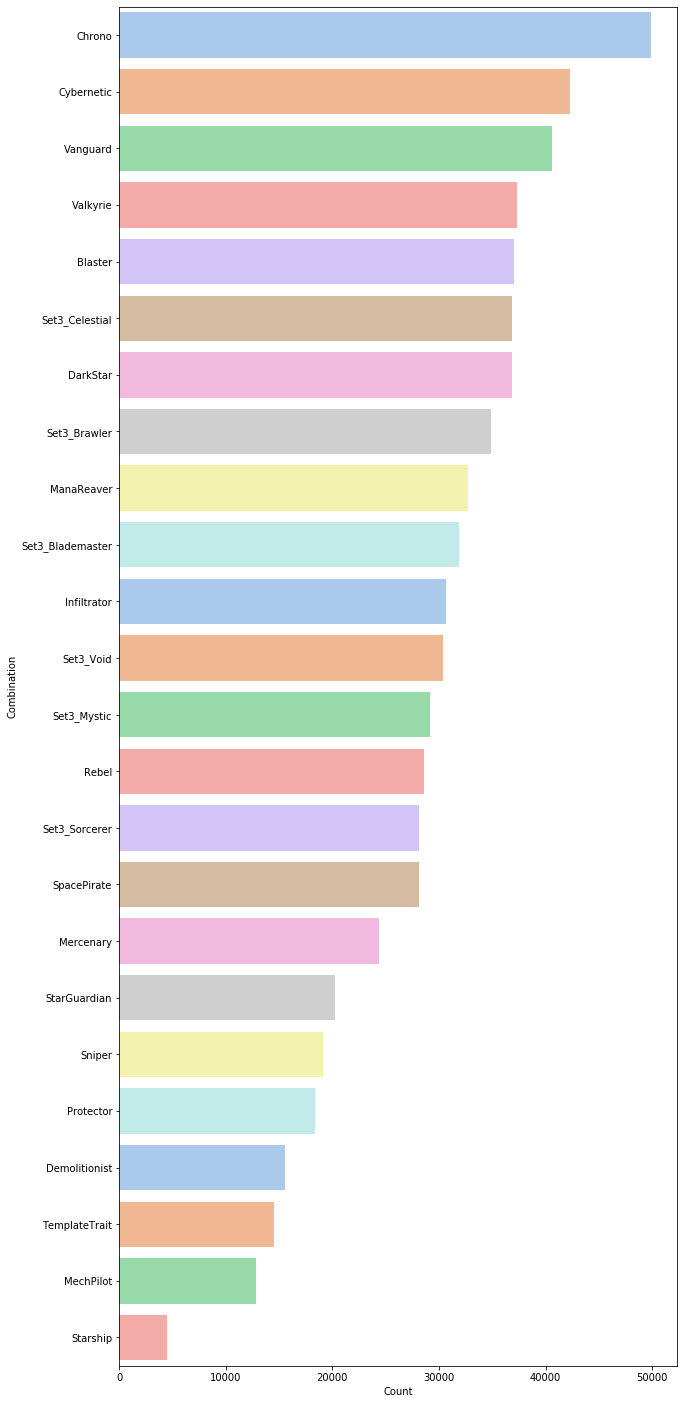

In [9]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Combination', data=all_combi, palette = 'pastel')
plt.show()

#### - 직업 시너지 TOP3: 1. Vanguard(선봉대), 2. Blaster(총잡이), 3. Brawler(싸움꾼)

In [10]:
Classes = all_combi.iloc[[2, 4, 7, 8, 9, 10, 12, 14, 16, 18, 19, 20, 23], :].reset_index(drop=True)
Classes

,Combination,Count
0,Vanguard,40553
1,Blaster,37001
2,Set3_Brawler,34835
3,ManaReaver,32670
4,Set3_Blademaster,31898
5,Infiltrator,30675
6,Set3_Mystic,29117
7,Set3_Sorcerer,28160
8,Mercenary,24382
9,Sniper,19140


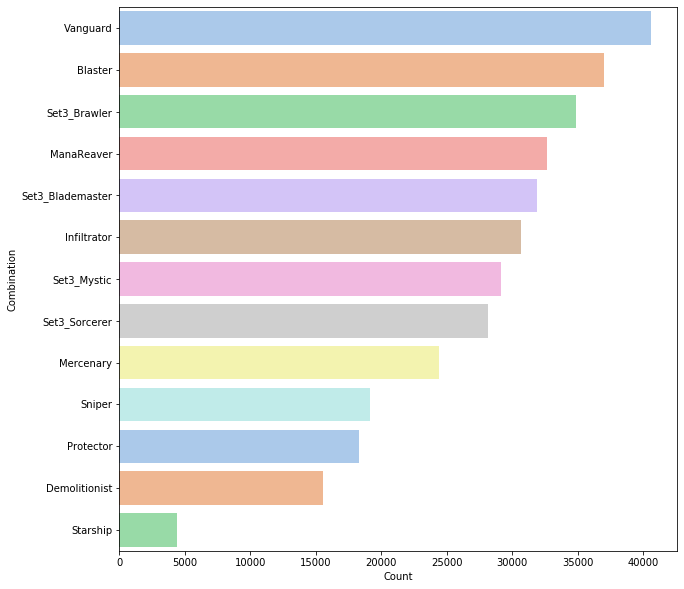

In [11]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=Classes, palette = 'pastel')
plt.show()

#### - 계열 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. Valkyrie(발키리)

In [12]:
Origin = all_combi.iloc[[0, 1, 3, 5, 6, 11, 13, 15, 17, 22], :].reset_index(drop=True)
Origin

,Combination,Count
0,Chrono,49844
1,Cybernetic,42260
2,Valkyrie,37298
3,Set3_Celestial,36875
4,DarkStar,36831
5,Set3_Void,30352
6,Rebel,28602
7,SpacePirate,28124
8,StarGuardian,20218
9,MechPilot,12861


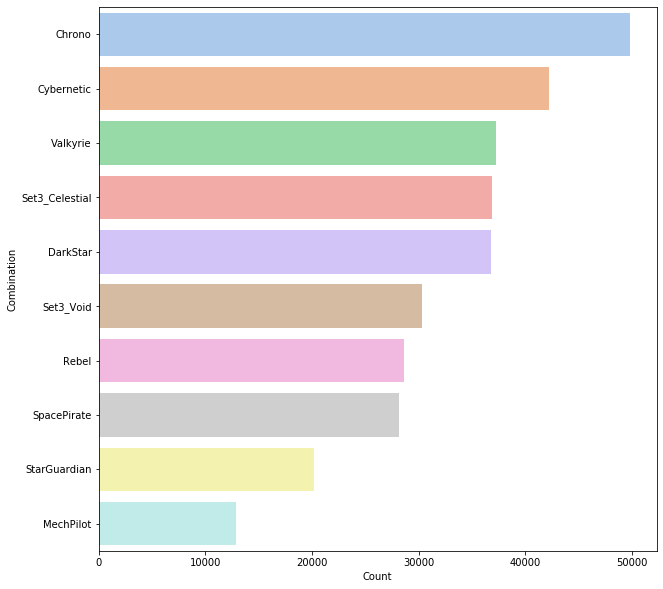

In [13]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=Origin, palette = 'pastel')
plt.show()

#### - 시너지 조합

In [14]:
team_comps = chall.combination.value_counts().to_frame()
team_comps.head()

,combination
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 2, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 1}",3086
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 3, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Starship': 1, 'Valkyrie': 1}",1304
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, 'Rebel': 2, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1}",1243
"{'Blaster': 1, 'Chrono': 2, 'Cybernetic': 6, 'Infiltrator': 1, 'ManaReaver': 2, 'Set3_Blademaster': 3, 'Set3_Brawler': 1, 'Vanguard': 1}",883
"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrator': 4, 'MechPilot': 3, 'Set3_Sorcerer': 2, 'Set3_Void': 1, 'Valkyrie': 1}",709


#### - 챔피언 사용 순위 TOP3: 1. Vi(바이), 2. Blitzcrank(블리츠크랭크), 3. Ezreal(이즈리얼)

In [15]:
champ = chall.champion.apply(lambda x: re.findall('[a-zA-Z]+',x)).to_frame()
all_champ = Counter()
for champ in champ.champion:
    all_champ += Counter(champ)

,champion
0,"[JarvanIV, items, star, Sona, items, star, Rak..."
1,"[Malphite, items, star, Yasuo, items, star, So..."
2,"[KaiSa, items, star, Annie, items, star, Shaco..."
3,"[KaiSa, items, star, Annie, items, star, Shaco..."
4,"[Ziggs, items, star, Yasuo, items, star, Sona,..."
...,...
79994,"[KhaZix, items, star, KaiSa, items, star, Anni..."
79995,"[Fiora, items, star, Leona, items, star, Shen,..."
79996,"[TwistedFate, items, star, Malphite, items, st..."
79997,"[Malphite, items, star, Graves, items, star, B..."


In [17]:
all_champ = pd.DataFrame.from_dict(all_champ, orient='index', columns=['Count'])
all_champ = all_champ.drop(['star','items']).reset_index()
all_champ = all_champ.sort_values(['Count'], ascending=False)
all_champ.columns = ['Champ','Count']
all_champ = all_champ.reset_index(drop=True)
all_champ

,Champ,Count
0,Vi,27744
1,Blitzcrank,24145
2,Ezreal,23573
3,MissFortune,22516
4,Kassadin,21862
5,Kayle,19330
6,WuKong,18800
7,Malphite,18516
8,ChoGath,18290
9,Ashe,17649


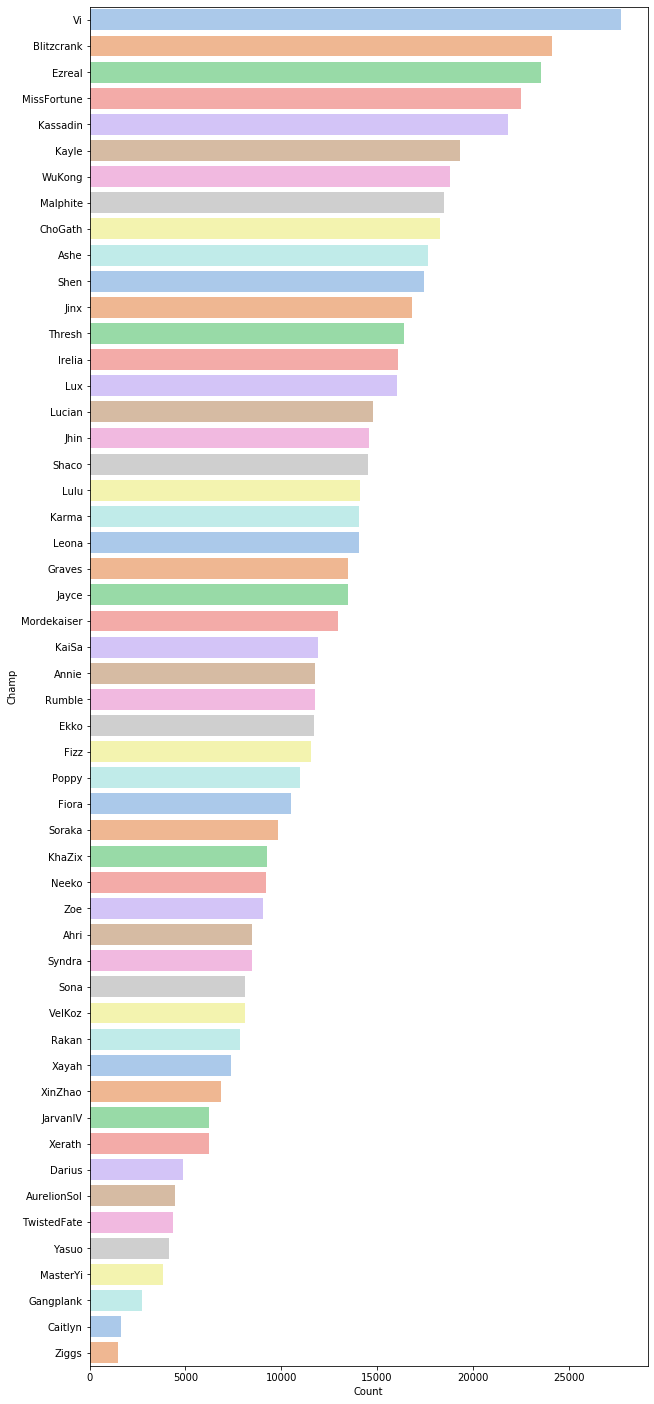

In [18]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Champ', data=all_champ, palette = 'pastel')
plt.show()

### 순위 TOP 4

In [19]:
top4_combi = chall[chall.Ranked<=4].combination.apply(lambda x: re.findall('[a-zA-Z]+[0-9]?_?[a-zA-Z]+',x)).to_frame()
top4_all_combi = Counter()
for combi in top4_combi.combination:
    top4_all_combi += Counter(combi)


,combination
0,"[DarkStar, Protector, Rebel, Set3_Celestial, S..."
1,"[Blaster, Mercenary, Rebel, Set3_Blademaster, ..."
2,"[Cybernetic, DarkStar, Demolitionist, Infiltra..."
3,"[Blaster, Cybernetic, DarkStar, Demolitionist,..."
8,"[Blaster, Demolitionist, Mercenary, Protector,..."
...,...
79986,"[Blaster, Chrono, ManaReaver, Mercenary, Set3_..."
79991,"[Blaster, Chrono, Cybernetic, Demolitionist, M..."
79992,"[Blaster, Demolitionist, Mercenary, Rebel, Set..."
79993,"[Blaster, Chrono, Cybernetic, Infiltrator, Man..."


#### - 전체 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. Valkyrie(발키리)

In [21]:
top4_all_combi = pd.DataFrame.from_dict(top4_all_combi, orient='index', columns=['Count']).reset_index()
top4_all_combi = top4_all_combi.sort_values(['Count'], ascending=False)
top4_all_combi.columns = ['Combination','Count']
top4_all_combi = top4_all_combi.reset_index(drop=True)
top4_all_combi

,Combination,Count
0,Chrono,25611
1,Cybernetic,21783
2,Valkyrie,20109
3,Vanguard,19913
4,Set3_Celestial,19198
5,Blaster,19187
6,DarkStar,18984
7,Set3_Brawler,17385
8,ManaReaver,16852
9,Set3_Blademaster,16612


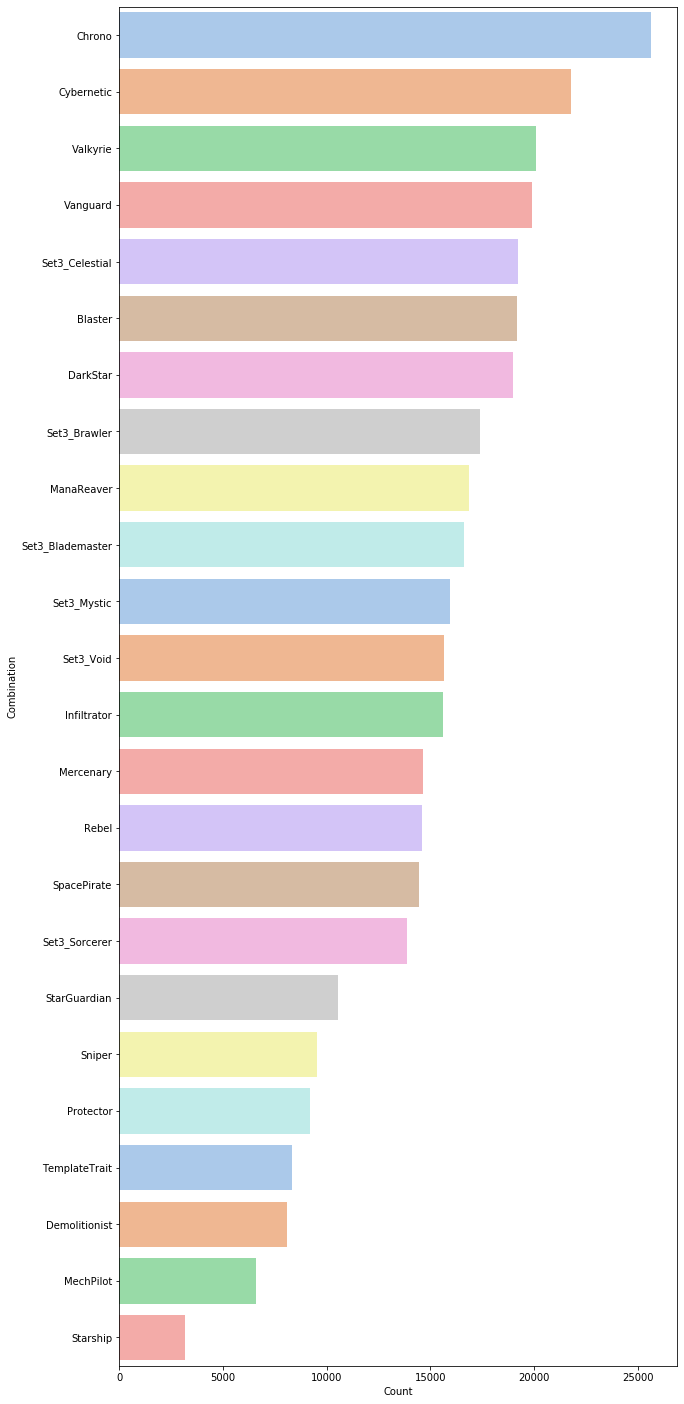

In [22]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Combination', data=top4_all_combi, palette = 'pastel')
plt.show()

#### - 직업 시너지 TOP3: 1. Vanguard(선봉대), 2. Blaster(총잡이), 3. Brawler(싸움꾼)

In [23]:
top4_Classes = top4_all_combi.iloc[[3,5,7,8,9,10,12,13,16,18,19,21,23], :].reset_index(drop=True)
top4_Classes

,Combination,Count
0,Vanguard,19913
1,Blaster,19187
2,Set3_Brawler,17385
3,ManaReaver,16852
4,Set3_Blademaster,16612
5,Set3_Mystic,15956
6,Infiltrator,15628
7,Mercenary,14639
8,Set3_Sorcerer,13866
9,Sniper,9529


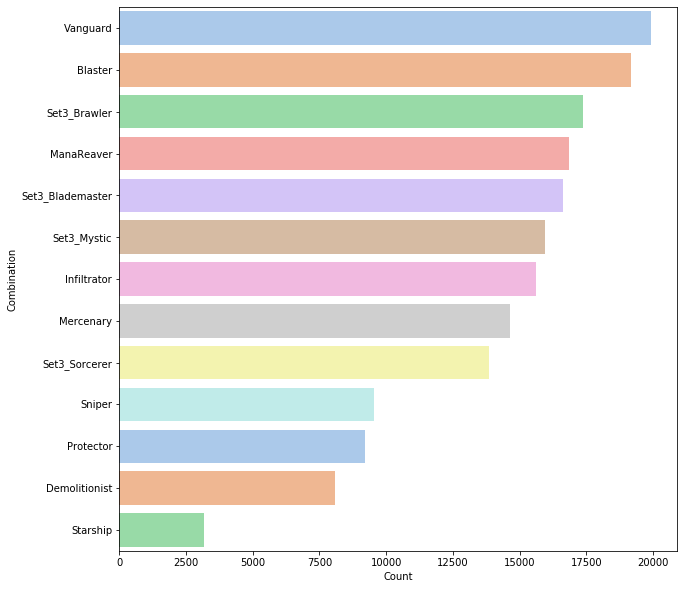

In [24]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=top4_Classes, palette = 'pastel')
plt.show()

#### - 계열 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. Valkyrie(발키리)

In [25]:
top4_Origin = top4_all_combi.iloc[[0,1,2,4,6,11,14,15,17,22], :].reset_index(drop=True)
top4_Origin

,Combination,Count
0,Chrono,25611
1,Cybernetic,21783
2,Valkyrie,20109
3,Set3_Celestial,19198
4,DarkStar,18984
5,Set3_Void,15645
6,Rebel,14592
7,SpacePirate,14454
8,StarGuardian,10538
9,MechPilot,6596


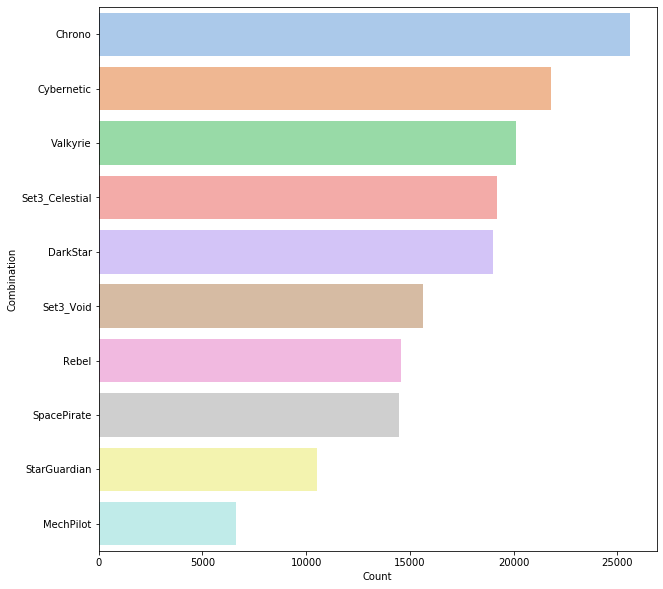

In [26]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=top4_Origin, palette = 'pastel')
plt.show()

#### - 시너지 조합

In [27]:
team_comps = chall[chall.Ranked<=4].combination.value_counts().to_frame()
team_comps.head()

,combination
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 2, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 1}",1272
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 3, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Starship': 1, 'Valkyrie': 1}",1072
"{'Blaster': 1, 'Chrono': 2, 'Cybernetic': 6, 'Infiltrator': 1, 'ManaReaver': 2, 'Set3_Blademaster': 3, 'Set3_Brawler': 1, 'Vanguard': 1}",424
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 2, 'Set3_Blademaster': 1, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 2}",337
"{'Blaster': 2, 'Chrono': 4, 'ManaReaver': 2, 'Mercenary': 1, 'Set3_Blademaster': 3, 'Set3_Celestial': 2, 'Valkyrie': 2, 'Vanguard': 1}",337


#### - 챔피언 사용 순위 TOP3: 1. Vi(바이), 2. MissFortune(미스포츈), 3. Blitzcrank(블리츠크랭크)

In [28]:
top4_champ = chall[chall.Ranked<=4].champion.apply(lambda x: re.findall('[a-zA-Z]+',x)).to_frame()
top4_cham = Counter()
for champ in top4_champ.champion:
    top4_cham += Counter(champ)

,champion
0,"[JarvanIV, items, star, Sona, items, star, Rak..."
1,"[Malphite, items, star, Yasuo, items, star, So..."
2,"[KaiSa, items, star, Annie, items, star, Shaco..."
3,"[KaiSa, items, star, Annie, items, star, Shaco..."
8,"[Malphite, items, star, Yasuo, items, star, So..."
...,...
79986,"[Shen, items, star, Ezreal, items, star, Kassa..."
79991,"[Malphite, items, star, Graves, items, star, B..."
79992,"[Ziggs, items, star, Yasuo, items, star, Sona,..."
79993,"[Fiora, items, star, Leona, items, star, Lucia..."


In [30]:
top4_cham = pd.DataFrame.from_dict(top4_cham, orient='index', columns=['Count'])
top4_cham = top4_cham.drop(['star','items']).reset_index()
top4_cham = top4_cham.sort_values(['Count'], ascending=False)
top4_cham.columns = ['Champ','Count']
top4_cham = top4_cham.reset_index(drop=True)
top4_cham

,Champ,Count
0,Vi,14423
1,MissFortune,13590
2,Blitzcrank,11968
3,Ezreal,11918
4,Kassadin,10913
5,Kayle,10515
6,Thresh,10268
7,WuKong,9625
8,ChoGath,9610
9,Malphite,9529


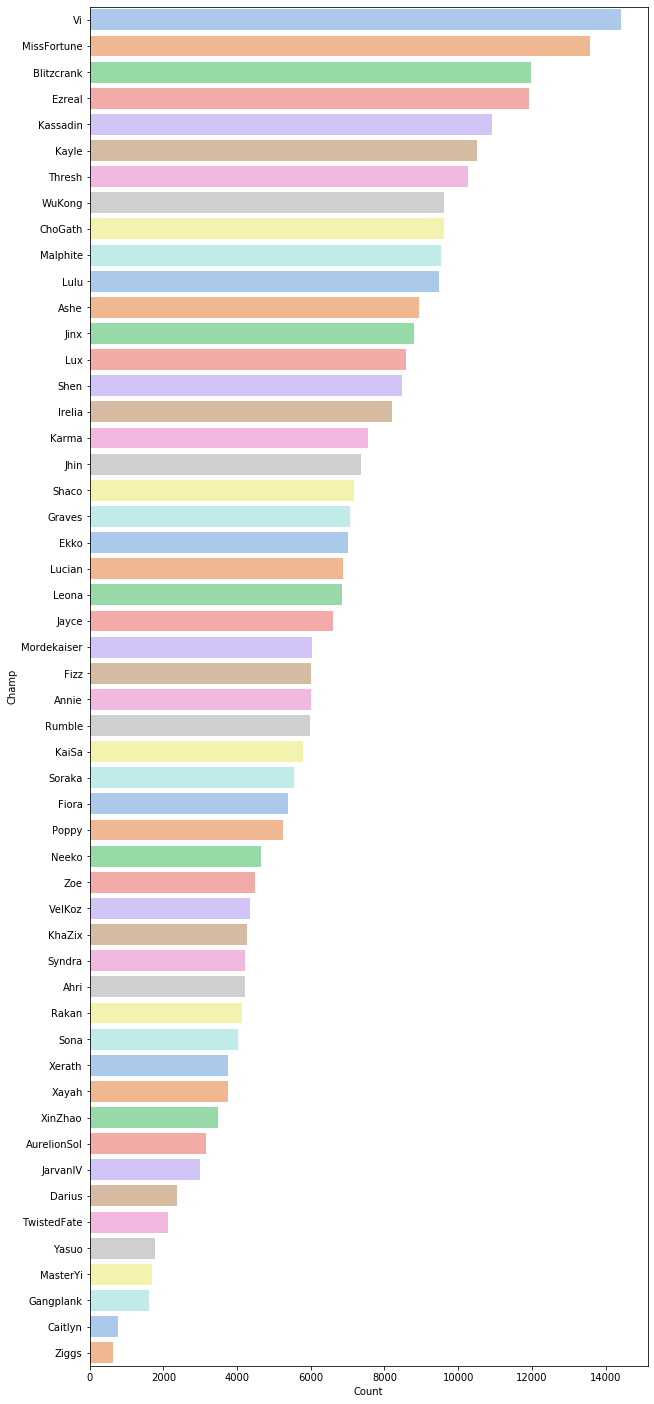

In [31]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Champ', data=top4_cham, palette = 'pastel')
plt.show()